# 远程推理应用示例2

本示例使用Picasso模型远程推理，进行图像风格迁移处理，以图片方式显示结果，简要说明了基于Atlas 200DK 开发板的远程推理应用开发方法之一。

## 主要特点：

1. 使用 Inferemote.DataSource 类获取输入，输入源可为图片目录、视频文件、摄像头或者图片的HTTP超链接地址；
2. 构造 inferemote.InferenceJob 进行远程推理，内置支持多线程；
3. 编码对推理结果进行后续处理及展示。

## 远程推理平台
本示例与所使用的远程推理集群服务器均运行在华为云ECS服务器上，集群中的12台Atlas200DK开发板部署于电子科技大学校园. 具体请参考 https://gitee.com/haojiash/atlas200dk_remote.

## 代码示例
【提醒】：注意修改 RemoteIP 和 测试输入 设置。

### 1. 导入软件包

In [1]:
"""
Inferemote: a Remote Inference Toolkit for Atlas 200DK

"""

import cv2 as cv
import numpy as np

### 2. 实例化风格迁移应用算法的对象

In [2]:
''' New an algorithm instance'''
from inferemote.airlab import Picasso
air = Picasso()

''' 回调函数设置 '''
def test_func(image):
    orig_shape = image.shape[:2]
    result = air.inference_remote(image)
    result = cv.resize(result, orig_shape[::-1])
    image = np.hstack([image, result])
    return image

### 3. 远程推理设置

In [3]:
''' Specify the Remote for model inference'''
remote = '192.168.1.123'
air.use_remote(remote)


03-18 17:25:11 [INFO]  -atlas- Trying model inference on REMOTE ``192.168.1.123''...


### 4. 设置输入图像源，可以为：视频文件、图片目录、摄像头或者图片的HTTP超链接地址

In [4]:
''' Read inputs from data source '''
from inferemote.testing.data_source import ImageFactory #ImageSource, VideoSource, UrlSource

# 以URL图片为输入
url_input = 'https://c7xcode.obs.myhuaweicloud.com/models/style_transfer_picture/data/test.jpg'

# 以图片目录为输入
dir_input = './data/pictures'

# 以摄像头为输入（如服务在ECS云服务器中，实际不具有摄像头）
camear_input = 'camera'

# 以视频文件为输入
video_input = './data/skiing.mp4'


# 自动获取输入的Image流
ds = ImageFactory().get_stream(dir_input)

### 5. 实例化一个推理任务

In [5]:
''' Start an inference task '''
from inferemote.inference_job import InferenceJob
job = InferenceJob(test_func, ds, threads=4, wait=0.01)
job.submit()

### 6. 辅助函数

In [6]:
''' Helper functions '''
def show_result(image):
    from  matplotlib import pyplot as plt
    image = image [:,:,::-1]         # transform image to rgb
    plt.imshow(image)
    plt.show()

### 7. 获取结果并处理

03-18 17:25:29 [WARNING]  --------- Data source CLOSED -----------
03-18 17:25:30 [INFO]  -atlas- Time costs: 0.027/0.156/0.011(s) and 0.194(s) for pre/remote/post and totally.


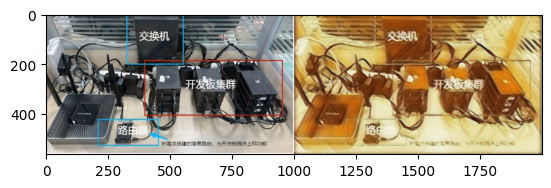

In [7]:
''' Processing the results '''
while True:
    success, result, name = job.get_result()

    if success:
        show_result(result)
    else:
       break

In [ ]:
# Ends.